In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Independence Tests

Discovering and deciphering relationships in data is often a difficult and opaque process. Identifying causality among variables is particularly important since it allows us to know which relationships to investigate further. This problem, called the independence testing problem, can be defined as follows: Consider random variables $X$ and $Y$ that have joint density $F_{XY} = F_{X|Y} F_Y$. The null hypothesis is thus that $X$ and $Y$ are independently distributed from one another; in other words, $F_{XY} = F_X F_Y$. The alternate hypothesis is that the $X$ and $Y$ are not indepenently distributed from on another. That is,

\begin{align*}
H_0: F_{XY} &= F_X F_Y \\
H_A: F_{XY} &\neq F_X F_Y
\end{align*}

Fortunately, `mgc` provides an easy-to-use structure to use tests such as these. All tests have a class associated with it and have a `.test` method. The nuances of each test will be examined below; for the sake of this tutorial, the `MGC` class will be used.

Importing tests from `mgc` is similar to importing any other test. `mgc` also has a `sims` module, which contains several linear and nonlinear dependency structures to test the cases for which each test will perform best.

In [13]:
from mgc.independence import MGC
from mgc.sims import linear, spiral, multimodal_independence

First, let's generate some simulated data. The independence simulations included take on required paramaters number of samples (`n`) and number of dimensions (`p`) with optional paramaters mentioned in the [reference](https://mgc.neurodata.io/reference/sims.html#independence-simulations) section of the docs. Looking at some linearly distributed data first, let's look at 100 samples of noisey data and generate a unidimensional `x` and `y` (a 1000 sample of no noise simulated data is shown the trend in the data).

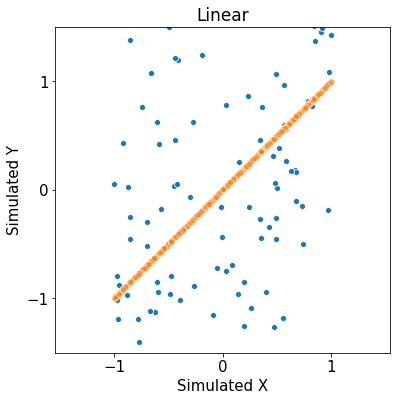

In [27]:
x, y = linear(100, 1, noise=True)
x_no_noise, y_no_noise = linear(1000, 1, noise=False)

fig = plt.figure(figsize=(6,6))
ax = sns.scatterplot(x=x[:,0], y=y[:,0])
ax = sns.scatterplot(x=x_no_noise[:,0], y=y_no_noise[:,0], alpha=0.5)
ax.set_xlabel('Simulated X', fontsize=15)
ax.set_ylabel('Simulated Y', fontsize=15) 
plt.title("Linear", fontsize=17)
plt.axis('equal')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xticks([-1, 0, 1], fontsize=15)
plt.yticks([-1, 0, 1], fontsize=15)
plt.show()